# This notebook is used to visualize MRI scans and their segmentation masks.


In [1]:
import nibabel as nib
import numpy as np
import matplotlib.pyplot as plt
import os

# Mount the google drive
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [22]:
import os
import nibabel as nib
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from matplotlib.patches import Patch

# -------------------------------
# Config
# -------------------------------
base_path = "drive/MyDrive/Training_and_Ablation_Studies/NUH"
patient_folders = ["20CA015_N222"]  # or use: os.listdir(base_path)

# Colors for 8 labels (0–7)
colors = [
    (0, 0, 0, 0),            # 0 = Background (transparent)
    (0.90, 0.10, 0.10, 0.6), # 1 = LV blood pool (soft red)
    (0.00, 0.65, 0.35, 0.6), # 2 = LV myocardium (emerald green)
    (0.15, 0.15, 0.75, 0.6), # 3 = Scar (royal blue)
    (0.98, 0.85, 0.05, 0.6), # 4 = RV blood pool (gold yellow)
    (0.30, 0.70, 0.95, 0.6), # 5 = RV myocardium (sky blue)
    (0.95, 0.50, 0.00, 1.0), # 6 = LV papillary muscle + apparatus (bright orange)
    (0.0, 0.85, 0.85, 0.8)   # 7 = Aorta (+/- LVOT) (teal/cyan)
]

cmap = ListedColormap(colors)

# Label names
label_names = {
    0: "Background",
    1: "LV blood pool",
    2: "LV myocardium",
    3: "Scar",
    4: "RV blood pool",
    5: "RV myocardium",
    6: "LV papillary muscle",
    7: "Aorta (+/- LVOT)"
}

# -------------------------------
# Loop through patients
# -------------------------------
for folder in patient_folders:
    print(f"\n************ Showing patient {folder} ************")
    files = sorted(os.listdir(os.path.join(base_path, folder)))

    image_path = os.path.join(base_path, folder, files[0])
    label_path = os.path.join(base_path, folder, files[1])

    # Load image and labels
    nii_image = nib.load(image_path)
    image = nii_image.get_fdata()
    label = nib.load(label_path).get_fdata()

    print(f"Volume shape: {image.shape}, Label shape: {label.shape}")
    print(f"Voxel spacing: {nii_image.header.get_zooms()}")

    # -------------------------------
    # Loop through slices
    # -------------------------------
    for i in range(image.shape[2]):
        img_slice = image[:, :, i]
        label_slice = label[:, :, i]

        # Find which labels are present in this slice
        present_labels = np.unique(label_slice).astype(int)
        present_labels = [l for l in present_labels if l in label_names and l != 0]

        if len(present_labels) == 0:
            continue  # skip if only background

        # -------------------------------
        # Plot MRI + overlay
        # -------------------------------
        fig, axes = plt.subplots(1, 2, figsize=(12, 6))

        # Left: MRI only
        axes[0].imshow(img_slice, cmap="gray")
        axes[0].set_title(f"Slice {i} - MRI")
        axes[0].axis("off")

        # Right: MRI + labels overlay
        axes[1].imshow(img_slice, cmap="gray")
        axes[1].imshow(label_slice, cmap=cmap, vmin=0, vmax=len(colors)-1)
        axes[1].set_title(f"Slice {i} - MRI with Labels")
        axes[1].axis("off")

        # Dynamic legend (only show present labels)
        legend_elements = [
            Patch(facecolor=colors[l], edgecolor="k", label=label_names[l])
            for l in present_labels
        ]
        axes[1].legend(handles=legend_elements, loc="lower right", fontsize=8)

        plt.tight_layout()
        plt.show()


Output hidden; open in https://colab.research.google.com to view.


************ Showing patient 20CA015_N210 ************
Volume shape: (208, 256, 12, 1), Label shape: (208, 256, 12)
Voxel spacing: (np.float32(1.5625), np.float32(1.5625), np.float32(9.600001), np.float32(0.75))


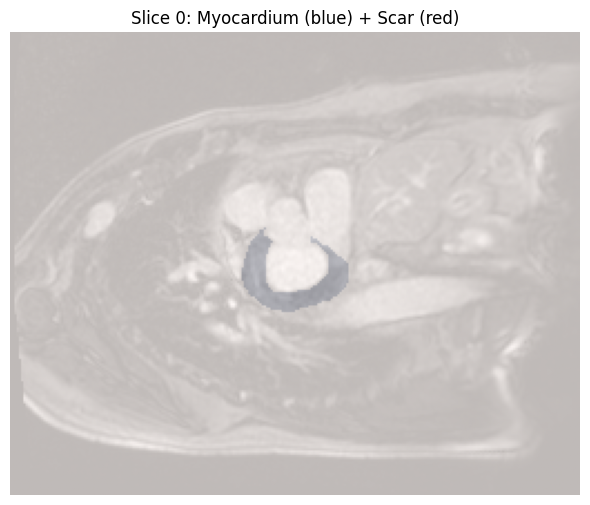

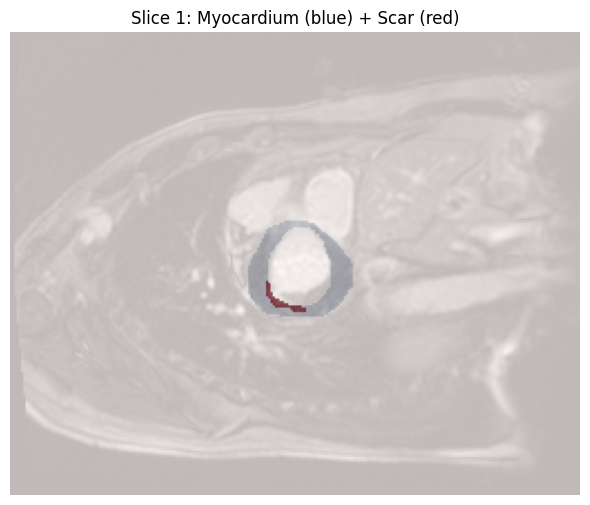

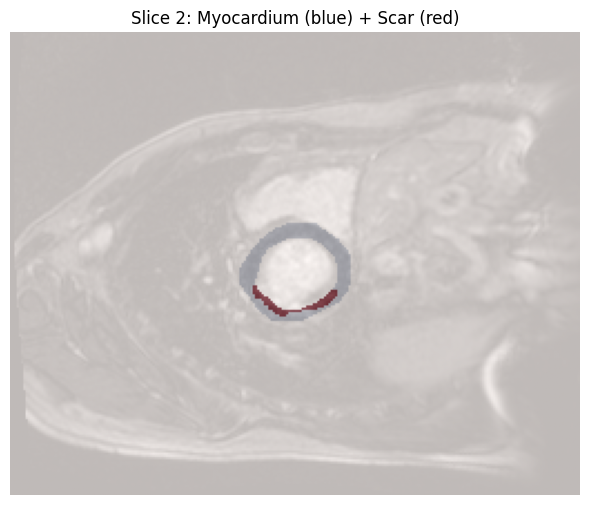

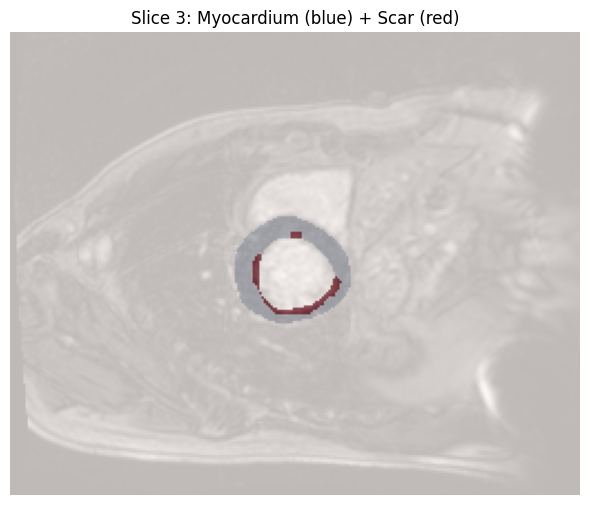

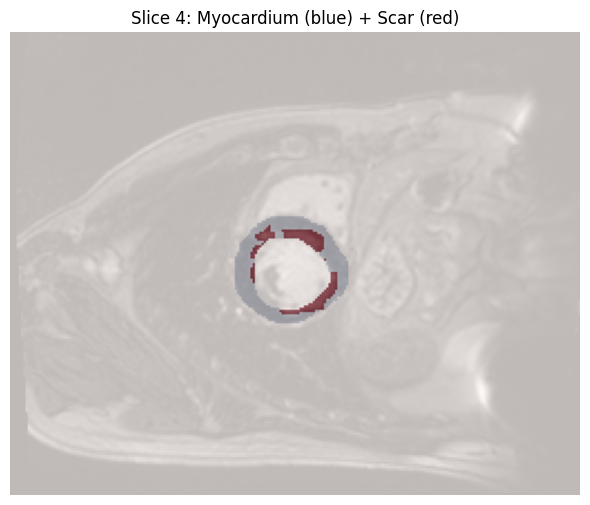

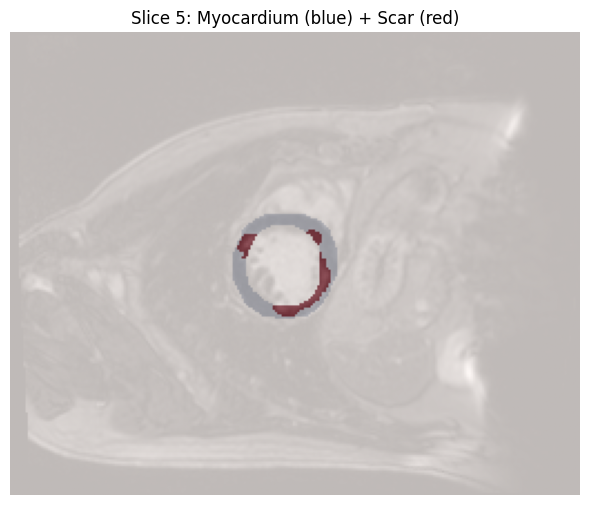

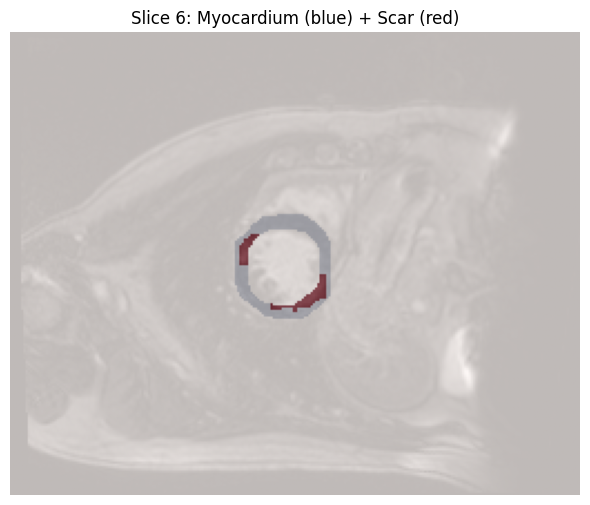

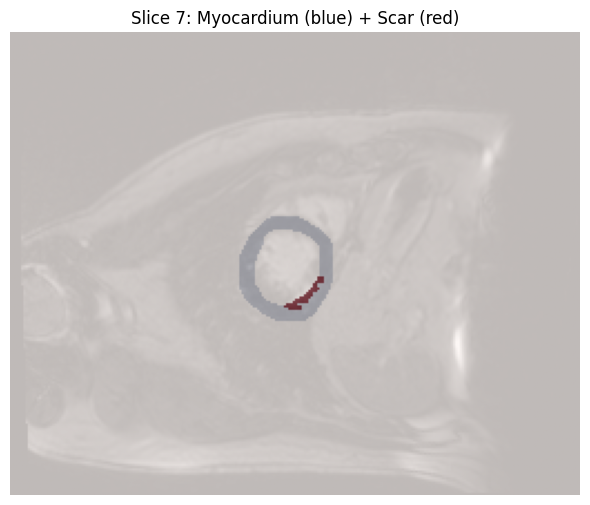

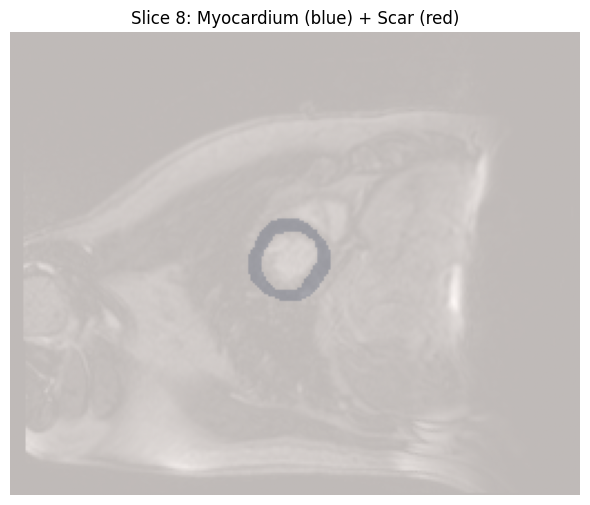

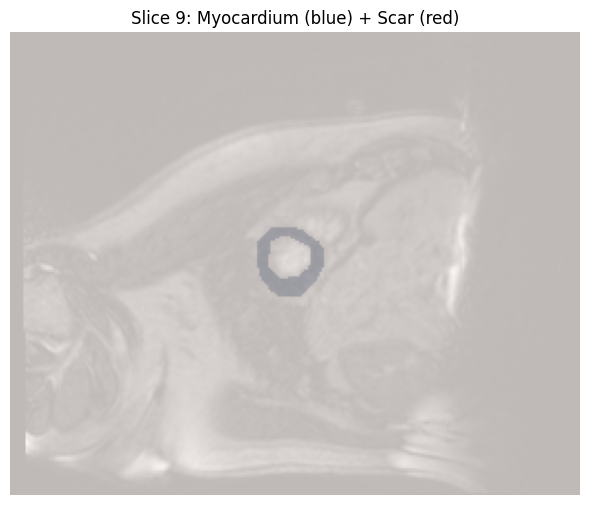

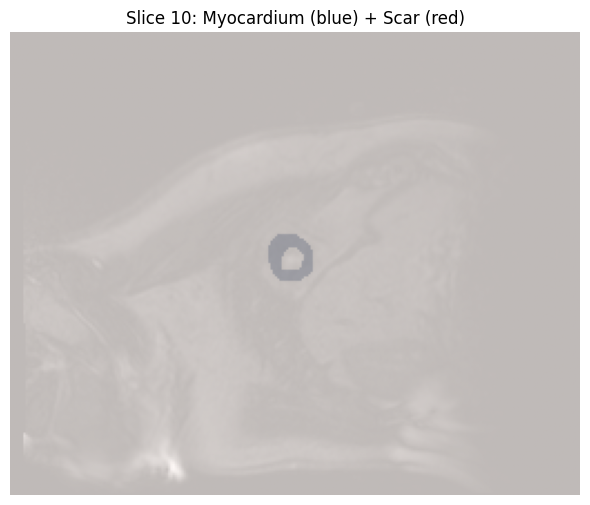

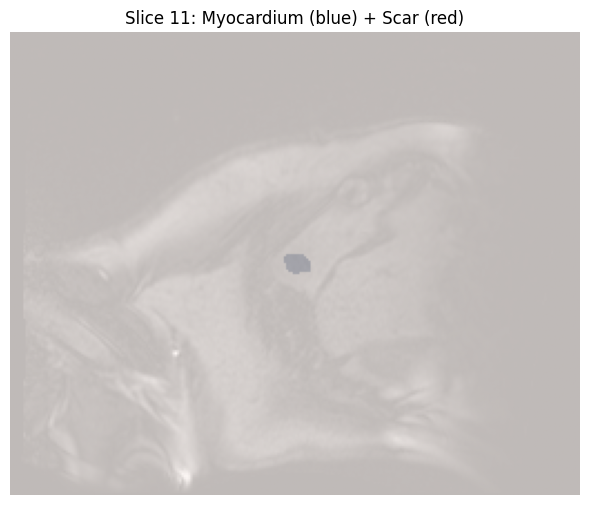

In [ ]:
# Base path to patient scan folders
base_path = "drive/MyDrive/Training_and_Ablation_Studies/NUH"

# List of patient folders to visualize
patient_folders = ["20CA015_N210"]  # os.listdir(base_path)

# Loop through each patient folder
for folder in patient_folders:
    print(f"\n************ Showing patient {folder} ************")
    files = sorted(os.listdir(os.path.join(base_path, folder)))

    image_path = os.path.join(base_path, folder, files[0])
    label_path = os.path.join(base_path, folder, files[1])

    # Load the NIfTI image and label
    nii_image = nib.load(image_path)
    image = nii_image.get_fdata()
    label = nib.load(label_path).get_fdata()

    print(f"Volume shape: {image.shape}, Label shape: {label.shape}")
    print(f"Voxel spacing: {nii_image.header.get_zooms()}")

    # Loop through each slice along the Z-axis
    for i in range(image.shape[2]):
        fig, ax = plt.subplots(figsize=(6, 6))

        # Extract current slice of image and masks
        img_slice = image[:, :, i]
        myo_mask = (label[:, :, i] == 2).astype(float)   # Myocardium = 2
        scar_mask = (label[:, :, i] == 3).astype(float)  # Scar = 3

        # Show MRI slice in grayscale
        ax.imshow(img_slice, cmap='gray')
        # Overlay myocardium (blue, semi-transparent)
        ax.imshow(myo_mask, cmap='Blues', alpha=0.4)
        # Overlay scar (red, more opaque)
        ax.imshow(scar_mask, cmap='Reds', alpha=0.6)

        ax.set_title(f"Slice {i}: Myocardium (blue) + Scar (red)")
        ax.axis('off')
        plt.tight_layout()
        plt.show()
